<a href="https://colab.research.google.com/github/Sumitha007/Gen_AI/blob/main/Mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import pandas as pd
path = kagglehub.dataset_download("kandij/mall-customers")
csv_path=os.path.join(path, 'Mall_Customers.csv')
dt=pd.read_csv(csv_path)
dt.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x = dt.iloc[:,[3,4]].values

In [ ]:
from sklearn.cluster import KMeans
errors=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(x)
  errors.append(kmeans.inertia_)

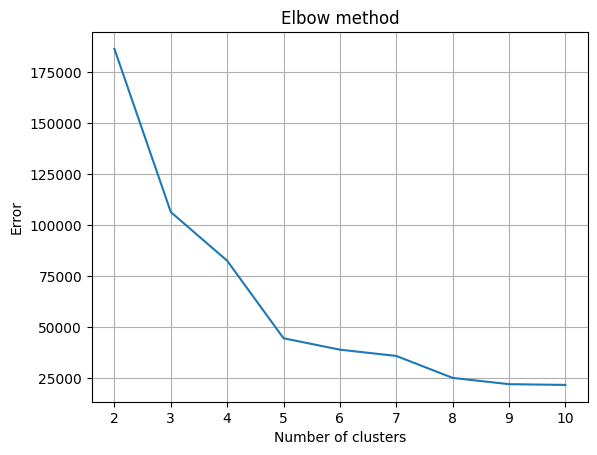

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),errors)
plt.title('Elbow method')
plt.xlabel('Number of clusters');
plt.ylabel('Error')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(x)

KMeans(n_clusters=5)

In [ ]:
dt['group'] = kmeans.predict(x)

In [ ]:
dt.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [ ]:
dt['group'].unique()

array([0, 2, 1, 4, 3], dtype=int32)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

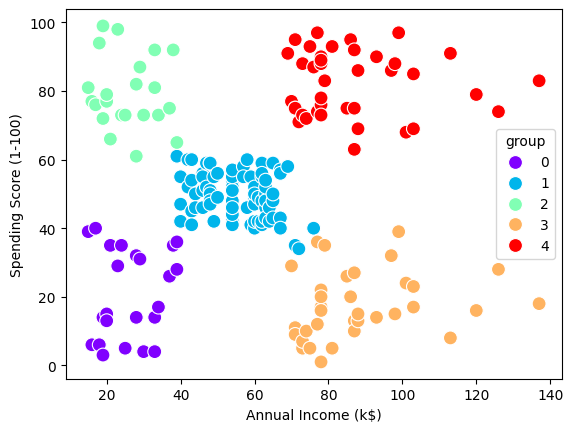

In [ ]:
import seaborn as sns
sns.scatterplot(x = dt['Annual Income (k$)'], y=dt['Spending Score (1-100)'],hue=dt['group'],palette='rainbow',s=100)

In [ ]:
dt[dt['group']==2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
1,2,Male,21,15,81,2
3,4,Female,23,16,77,2
5,6,Female,22,17,76,2
7,8,Female,23,18,94,2
9,10,Female,30,19,72,2
11,12,Female,35,19,99,2
13,14,Female,24,20,77,2
15,16,Male,22,20,79,2
17,18,Male,20,21,66,2
19,20,Female,35,23,98,2


In [ ]:
dt[dt['group']==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,0
2,3,Female,20,16,6,0
4,5,Female,31,17,40,0
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
12,13,Female,58,20,15,0
14,15,Male,37,20,13,0
16,17,Female,35,21,35,0
18,19,Male,52,23,29,0


In [ ]:
kmeans.predict([[30,25]])


array([0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513]])